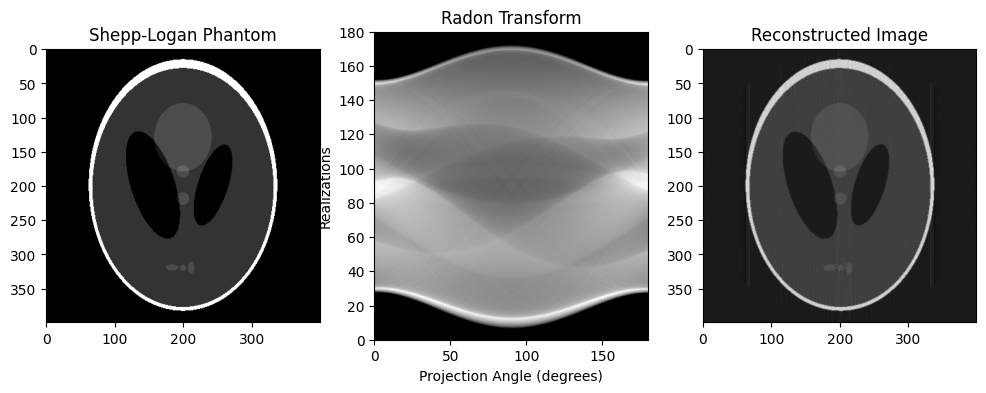

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

import torch
import torchvision.transforms.functional as TF

def plot_images(original, transformed, num_realizations):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Shepp-Logan Phantom')

    plt.subplot(1, 3, 2)
    plt.imshow(transformed, cmap='gray', extent=(0, 180, 0, num_realizations), aspect='auto')
    plt.title('Radon Transform')
    plt.xlabel('Projection Angle (degrees)')
    plt.ylabel('Realizations')

    reconstructed = iradon(transformed, theta=np.linspace(0., 180., transformed.shape[1]), circle=True)
    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed Image')

    plt.show()

def radon_transform(image, num_angles):
    angles = torch.linspace(0.0, 180.0, steps=num_angles)
    radon_images = []
    for angle in angles:
        rotated_image = TF.rotate(image.unsqueeze(0), angle.item())
        projection = torch.sum(rotated_image.squeeze(0), dim=0)
        radon_images.append(projection)

    return torch.stack(radon_images, dim=0)

def generate_phantom_and_radon(num_realizations):
    phantom = shepp_logan_phantom()

    angles = np.linspace(0, 180, num_realizations, endpoint=False)
    radon_transform = radon(phantom, theta=angles, circle=True)

    plot_images(phantom, radon_transform, num_realizations)

num_realizations = 180
generate_phantom_and_radon(num_realizations)

# compute PSNR and SSIM for image quality assesment

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# variation of the number of realizations

In [8]:
phantom = torch.tensor(shepp_logan_phantom())
a = radon_transform(phantom, 180)

In [9]:
a.size()

torch.Size([180, 400])

Text(0.5, 1.0, 'Shepp-Logan Phantom')

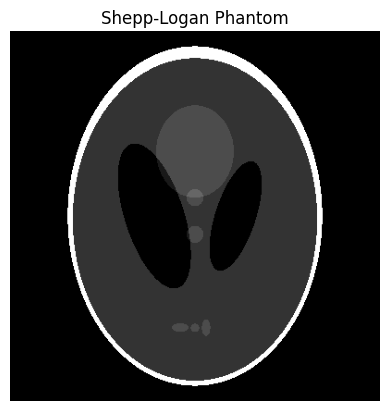

In [ ]:
phantom = shepp_logan_phantom()
plt.imshow(phantom, cmap='gray')
plt.axis('off')
plt.title('Shepp-Logan Phantom')

In [ ]:
#Mean Structural Similarity Index Map
def mssim(img1, img2, alpha, beta, gamma):
    """Return the Structural Similarity Map corresponding to input images img1
    and img2
    """

    # Convert to float64 to avoid floating point error and negative values in sigma1_sq or sigma2_sq
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # Data range
    L = np.max(img2) - np.min(img2)

    # Parameters from Wang et al. 2004
    sigma = 1.5
    K1 = 0.01
    K2 = 0.03
    C1 = (K1*L)**2
    C2 = (K2*L)**2

    # Convolve images (gaussian or uniform filter) to get mean for each patch

    filter_args = {'sigma': sigma, 'truncate': 3.5} # 3.5 is the number of sigmas to match Wang et al. to have filter size=11
    mu1 = gaussian_filter(img1,**filter_args)
    mu2 = gaussian_filter(img2,**filter_args)

    # Multiply images
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2

    # Convolve images (gaussian or uniform filter) to get variance and covariance for each patch. Remove negative values coming from floating point errors

    sigma1_sq = gaussian_filter(img1*img1,**filter_args) - mu1_sq
    sigma1_sq[sigma1_sq < 0] = 0
    sigma2_sq = gaussian_filter(img2*img2,**filter_args) - mu2_sq
    sigma2_sq[sigma2_sq < 0] = 0
    sigma12 = gaussian_filter(img1*img2,**filter_args) - mu1_mu2

    # Compute luminance, contrast and structure for each patch
    luminance =((2*mu1_mu2 + C1)/(mu1_sq + mu2_sq + C1))**alpha
    contrast=((2*np.sqrt(sigma1_sq*sigma2_sq) + C2)/(sigma1_sq + sigma2_sq + C2))**beta
    structure=((2*sigma12 + C2)/(2*np.sqrt(sigma1_sq*sigma2_sq) + C2))**gamma

    # Compute MSSIM
    MSSIM=np.mean(luminance*contrast*structure)
    return MSSIM
# Example of use
MSSIM_index=mssim(reconstructed, original, 0.5, 1, 1) # replace reconstructed by your Siren output and orginal by your ground truth

NameError: name 'reconstructed' is not defined